# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [20]:
# !pip install requests
# !pip install beautifulsoup4

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Webscraping reviews only from december 2021 to present day as COVID started to relax rules and things slowly got back to normal. 

In [22]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 3
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews


In [23]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Very competent check in sta...
1,"✅ Trip Verified | Check in was so slow, no se..."
2,✅ Trip Verified | My review relates to the ap...
3,✅ Trip Verified | This was my first time flyin...
4,✅ Trip Verified | Lots of cancellations and d...


In [24]:
df.to_csv('C:/Users/lavat/Documents/TheForage/BristishAirways/data/BA_reviews.csv', index=False)

In [25]:
# df = pd.read_csv('C:/Users/lavat/Documents/TheForage/BristishAirways/data/BA_reviews.csv')
# df.head() 

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data cleaning
##### Remove words that have no value and syntaxes

In [26]:
clean_df = df

In [35]:
clean_df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '')
clean_df['reviews'] = df['reviews'].str.replace('Not Verified', '')
clean_df['reviews'] = df['reviews'].str.replace('|', '')
clean_df['reviews'] = df['reviews'].str.replace(',', '')
clean_df['reviews'] = df['reviews'].str.replace('.', '')
clean_df['reviews'] = df['reviews'].str.replace('!', '')

C:\Users\lavat\AppData\Local\Temp\ipykernel_604\3681432292.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df['reviews'] = df['reviews'].str.replace('|', '')
C:\Users\lavat\AppData\Local\Temp\ipykernel_604\3681432292.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df['reviews'] = df['reviews'].str.replace('.', '')


In [40]:
clean_df['reviews'] = df['reviews'].str.replace('much', '')
clean_df['reviews'] = df['reviews'].str.replace('dtype', '')
clean_df['reviews'] = df['reviews'].str.replace('review', '')
clean_df['reviews'] = df['reviews'].str.replace('go', '')
clean_df['reviews'] = df['reviews'].str.replace('much', '')
clean_df['reviews'] = df['reviews'].str.replace('used', '')
clean_df['reviews'] = df['reviews'].str.replace('Name', '')
clean_df['reviews'] = df['reviews'].str.replace('ser', '')
clean_df['reviews'] = df['reviews'].str.replace('BA', '')
clean_df['reviews'] = df['reviews'].str.replace('British', '')
clean_df['reviews'] = df['reviews'].str.replace('reviews', '')
clean_df['reviews'] = df['reviews'].str.replace('Airways', '')
clean_df.head()


,reviews
0,Very competent check in staff saw had a pro...
1,Check in was so slow no self check in and b...
2,My relates to the appalling experiences I ...
3,This was my first time flying with & I was ...
4,Lots of cancellations and delays and no one...


In [41]:
clean_df.head()

,reviews
0,Very competent check in staff saw had a pro...
1,Check in was so slow no self check in and b...
2,My relates to the appalling experiences I ...
3,This was my first time flying with & I was ...
4,Lots of cancellations and delays and no one...


In [37]:
clean_df.shape

(300, 1)

###### Create variable for set of stop words we will ignore in creating our word cloud as these words provide no insight

In [38]:
stopwords = set(STOPWORDS)

###### Create word cloud generating function, as part of the learning experience let's create multiple word cloud generating function with different parameters to see how it changes the cloud, and which gives clearer insight

In [31]:
# def wordCloud(text, title = None):
#     wordcloud = WordCloud(
#         background_color = 'white',
#         stopwords=stopwords,
#         max_words=200,
#         max_font_size=40,
#         scale=3,
#         random_state=1
#     ).generate(str(text))

#     fig = plt.figure(1, figsize=(20, 20))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)
    
#     plt.imshow(wordcloud)
#     plt.show()

###### Apply word cloud function to generate first cloud and drop null values

In [32]:
# wordCloud(clean_df['reviews.text'].dropna(), 'First Cloud')

###### Increase number of word displayed limit 

In [33]:
# def wordCloud2(text, title = None):
#     wordcloud = WordCloud(
#         background_color = 'white',
#         stopwords=stopwords,
#         max_words=500,
#         max_font_size=70,
#         scale=10,
#         random_state=1
#     ).generate(str(text))

#     fig = plt.figure(1, figsize=(20, 20))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)
    
#     plt.imshow(wordcloud)
#     plt.show()

# wordCloud2(clean_df['reviews.text'].dropna(), 'Cloud with More words limit')

In [34]:
# def wordCloud2(text, title = None):
#     wordcloud = WordCloud(
#         background_color = 'white',
#         stopwords=stopwords,
#         max_words=2000,
#         # max_font_size=150,
#         scale=20,
#         random_state=1
#     ).generate(str(text))

#     fig = plt.figure(1, figsize=(20, 20))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)
    
#     plt.imshow(wordcloud)
#     plt.show()

# wordCloud2(clean_df['reviews.text'].dropna(), 'Cloud with max_font size not set, 2000 words limit, scale 20')

###### remove more words not useful for our analysis observed on the word cloud

###### Regenerate new cloud

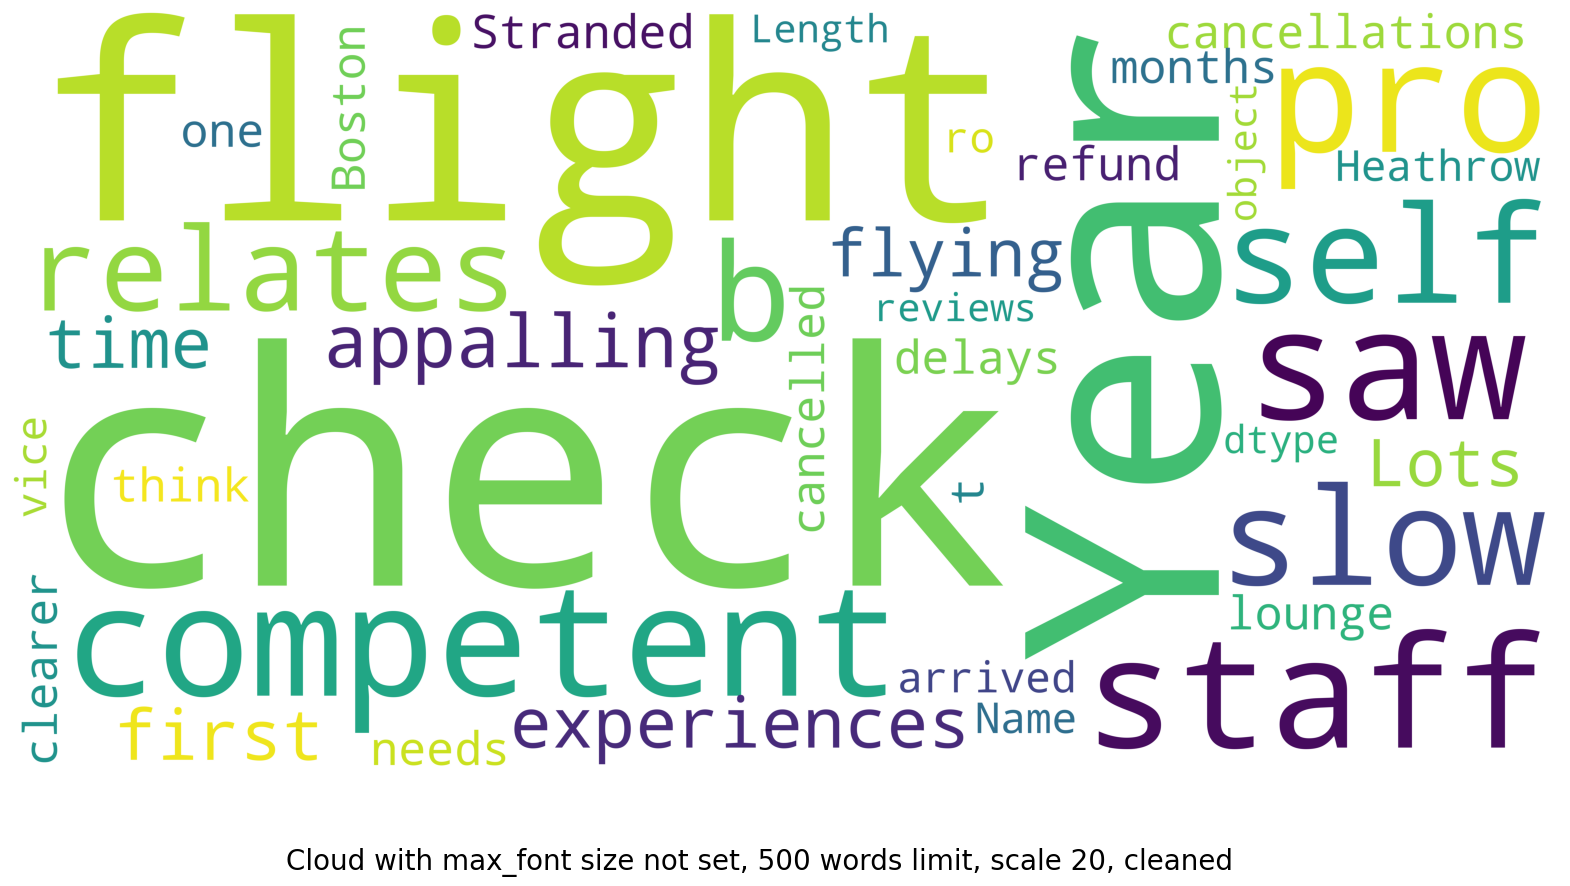

In [42]:
#use fewer word limit since there is no difference between 1500 and 2000
def wordCloud3(text, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords=stopwords,
        max_words=500,
        # max_font_size=150,
        scale=20,
        random_state=1
    ).generate(str(text))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

wordCloud3(clean_df['reviews'].dropna(), 'Cloud with max_font size not set, 500 words limit, scale 20, cleaned')